In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis='columns', inplace=True)


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [9]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [10]:
df.shape

(7043, 20)

In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [15]:
df1.TotalCharges.dtype

dtype('float64')

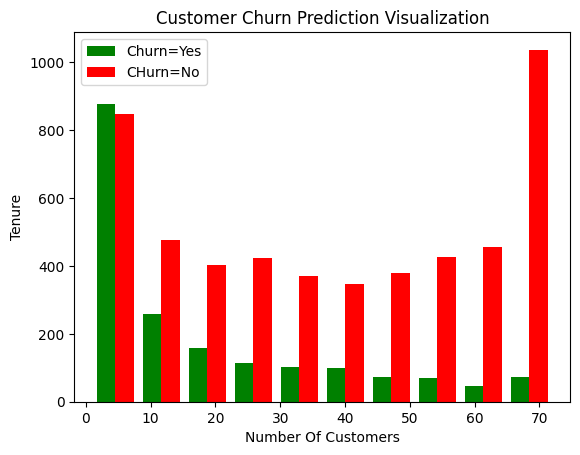

In [16]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'CHurn=No'])
plt.title('Customer Churn Prediction Visualization')
plt.xlabel('Number Of Customers')
plt.ylabel('Tenure')
plt.legend()

In [17]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, "No": 0}, inplace=True)                

In [22]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [24]:
df1['gender'].unique()

array([1, 0])

In [25]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod', ])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3041,0,0,0,1,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3029,0,0,1,1,23,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
col_to_scale = ['MonthlyCharges', 'TotalCharges', 'tenure']

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df2[col_to_scale] = sc.fit_transform(df2[col_to_scale])

In [29]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [30]:
X = df2.drop('Churn', axis = 'columns')
y = testLabels =  df2.Churn.astype(np.float32)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [32]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [33]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [34]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [35]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [36]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [37]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 12.3 MB/s eta 0:00:00


In [38]:
from tensorflow_addons import losses

In [39]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds



In [41]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.4907 - accuracy: 0.7575
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7920
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7940
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.7963
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8011
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.7991
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4156 - accuracy: 0.8014
Epoch 9/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4133 - accuracy: 0.8039
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4135 - accura

In [42]:
count_class_0, count_class_1 = df2.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [43]:
df_class_0.shape

(5163, 27)

In [44]:
df_class_1.shape

(1869, 27)

In [45]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [46]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [48]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6193 - accuracy: 0.6870
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7585
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7709
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7759
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7769
Epoch 11/

In [50]:
count_class_0, count_class_1

(5163, 1869)

In [51]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

In [52]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [53]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=y)

In [54]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [55]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5508 - accuracy: 0.7324
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4899 - accuracy: 0.7620
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.7620
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7625
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7656
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7692
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7708
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7722
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7747
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4541 - accura

In [57]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [58]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=0, stratify=y_sm)

In [62]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [63]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7200
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7787
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7804
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7850
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7855
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.7880
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7900
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7942
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7959
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4325 - accura

In [65]:
df2.Churn.vale_counts()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [66]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify=y)

In [68]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [69]:
4130/3

1376.6666666666667

In [70]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [72]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [73]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [ ]:
"""df_train = pd.concat([df3_class_0[:1495], df3_class_1], axis=0)"""

In [76]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis = 'columns')
  y_train = df_train.Churn

  return X_train, y_train

In [78]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

X_train.shape

(2990, 26)

In [79]:
y_preds_1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6863
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.7649
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7732
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7702
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7773
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7756
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7799
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7823
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.7813
Epoch 11/

In [80]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)

y_preds_2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6629
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7328
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7448
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7465
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7518
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7532
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7575
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7522
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7552
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7545
Epoch 11/

In [82]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)

y_preds_3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.6210 - accuracy: 0.6877
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7548
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4977 - accuracy: 0.7670
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7719
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7689
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7715
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7772
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7746
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7761
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7795
Epoch 11/

In [84]:
y_pred_final = y_preds_1.copy()

for i in range(len(y_preds_1)):
  n_ones = y_preds_1[i] + y_preds_2[i] + y_preds_3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [86]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407

